# Preprocessing text data for Natural Language Processing

This is a short, user-oriented introduction to the Python library `cophi_toolbox`.

In [1]:
import cophi_toolbox as ct
%matplotlib inline

## High-level API

With `ct.pipe()`, you can pipe a collection of text files through several NLP tasks, and get a document-term matrix with useful attributes and methods.

### What about the parameters?

You can use Python's built-in `help()` function to access `cophi_toolbox`'s short and sweet documentation:

In [2]:
help(ct.pipe)

Help on function pipe in module cophi_toolbox.api:

pipe(directory:Union[str, pathlib.Path], pathname_pattern:str='*.*', treat_as:Union[str, NoneType]=None, encoding:str='utf-8', lowercase:bool=True, ngrams:int=1, token_pattern:str='\\p{L}+\\p{P}?\\p{L}+', maximum:Union[int, NoneType]=None) -> Tuple[cophi_toolbox.model.Corpus, pandas.core.frame.DataFrame]
    Pipe a collection of text files through multiple NLP tasks.
    
    Parameters:
        directory: Path to the corpus directory.
        pathname_pattern: Glob pattern for text files.
        treat_as: Treat text files like this suffix. If None, `pathname_pattern` is considered.
        encoding: Encoding to use for UTF when reading.
        lowercase: If True, all letters are lowercase.
        ngrams: The `n` in ngram, e.g. 1 for unigram, 2 for bigram, etc.
        token_pattern: Regex pattern for a token.
        maximum: If not None, stop tokenizing after that much tokens.
    
    Returns:
        A Corpus model object and a

### Basic usage

Depending on the size of the text collection, this may take a while. These are the basic steps of the pipeline:

1. read,
2. tokenize,
3. create ngrams,
4. count ngrams,
5. arrange in a document-term matrix.

In [3]:
corpus, metadata = ct.pipe(directory="british-fiction-corpus",
                           pathname_pattern="**/*.txt",  # ref.: https://en.wikipedia.org/wiki/Glob_(programming)
                           treat_as=".txt",
                           encoding="utf-8",
                           lowercase=True,
                           ngrams=1,
                           token_pattern=r"\p{L}+\p{P}?\p{L}+",
                           maximum=None)

One useful attribute would be `size`, which gives you information about the number of documents and types:

In [4]:
corpus.size

documents       10
types        33050
dtype: int64

You can access the document-term matrix with the attribute `dtm`, which returns a pandas `DataFrame`:

In [5]:
corpus.dtm.iloc[:3,:10]

,a'mighty,a'most,a'n,a'ready,a-bakin,a-be,a-beatin,a-bed,a-begging,a-bleatin
af8b75fc-9c26-11e8-857e-002710199d64,0,0,0,0,0,0,0,0,0,0
af8b75fd-9c26-11e8-857e-002710199d64,0,1,0,0,0,0,0,0,0,0
af8b75fe-9c26-11e8-857e-002710199d64,1,1,0,2,0,0,1,0,0,0


The function `ct.pipe()` returned not only the `Corpus` object but also a `DataFrame` with metadata extracted from the filenames:

In [6]:
metadata.iloc[:3]

,filepath,parent,suffix,title,uuid
0,british-fiction-corpus/trollope_phineas.txt,british-fiction-corpus,.txt,trollope_phineas,af8b75fc-9c26-11e8-857e-002710199d64
1,british-fiction-corpus/dickens_bleak.txt,british-fiction-corpus,.txt,dickens_bleak,af8b75fd-9c26-11e8-857e-002710199d64
2,british-fiction-corpus/eliot_mill.txt,british-fiction-corpus,.txt,eliot_mill,af8b75fe-9c26-11e8-857e-002710199d64


You can easily add additional metadata to the existing `DataFrame`:

In [7]:
metadata["year"] = [1868, 1853, 1860, 1799, 1742, 1749, 1844, 1850, 1876, 1848]
metadata.iloc[:3]

,filepath,parent,suffix,title,uuid,year
0,british-fiction-corpus/trollope_phineas.txt,british-fiction-corpus,.txt,trollope_phineas,af8b75fc-9c26-11e8-857e-002710199d64,1868
1,british-fiction-corpus/dickens_bleak.txt,british-fiction-corpus,.txt,dickens_bleak,af8b75fd-9c26-11e8-857e-002710199d64,1853
2,british-fiction-corpus/eliot_mill.txt,british-fiction-corpus,.txt,eliot_mill,af8b75fe-9c26-11e8-857e-002710199d64,1860


Or you can save it with its pandas `to_csv()` method, edit or enrich it with a spreadsheet program like Excel, and read it again with `pd.read_csv()`.

> In case you want to map metadata to the document-term matrix, be aware that each line in the document-term matrix must have a unique index value.

The `Corpus` object also has a static method for mapping metadata (based on a [UUID](https://en.wikipedia.org/wiki/Universally_unique_identifier)) to the document-term matrix:

In [8]:
corpus.map_metadata(matrix=corpus.dtm,
                    metadata=metadata,
                    uuid="uuid",  # this is the connection (or, values of this column) between metadata and document in the matrix
                    fields=["year", "title"],  # select one or multiple metadata fields
                    sep="_").iloc[:3,:10]  # glue single metadata field values with this separator together

,a'mighty,a'most,a'n,a'ready,a-bakin,a-be,a-beatin,a-bed,a-begging,a-bleatin
1868_trollope_phineas,0,0,0,0,0,0,0,0,0,0
1853_dickens_bleak,0,1,0,0,0,0,0,0,0,0
1860_eliot_mill,1,1,0,2,0,0,1,0,0,0


### Advanced usage

The `Corpus` object has some useful methods and attributes. In addition to various normalized or standardized document-term matrices, there are a multitude of lexical complexity measures – by document or corpus.

#### Corpus vocabulary (or types)

In [9]:
corpus.types[:10]

["a'mighty",
 "a'most",
 "a'n",
 "a'ready",
 'a-bakin',
 'a-be',
 'a-beatin',
 'a-bed',
 'a-begging',
 'a-bleatin']

#### Most frequent words

You can return a list of the tokens itself (with `as_list=True`, which is default):

In [10]:
corpus.mfw(n=10,
           rel_freqs=True,  # use document-term matrix with relative word frequencies, otherwise absolute frequencies
           as_list=True)

['the', 'and', 'to', 'of', 'in', 'he', 'was', 'that', 'his', 'it']

Or with their frequencies:

In [11]:
mfw = corpus.mfw(n=10,
                 rel_freqs=True,
                 as_list=False)
mfw

the     0.498177
and     0.333683
to      0.314256
of      0.276484
in      0.172018
he      0.155096
was     0.149235
that    0.144934
his     0.121167
it      0.113929
dtype: float64

Because this is a pandas `Series`, you can easily plot the frequencies (first using `sort_values()`, that most common word is at the top of the plot):

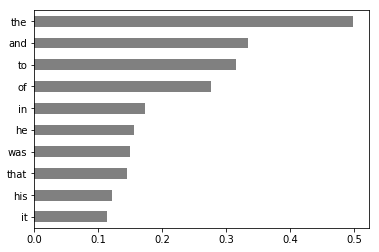

In [12]:
mfw.sort_values().plot.barh(color="grey")

#### Hapax legomena

In corpus linguistics, a hapax legomenon is a word that occurs only once within a context, or in this case in a single text.

In [13]:
corpus.hapax[:10]

["a'mighty",
 "a'n",
 'a-bakin',
 'a-beatin',
 'a-begging',
 'a-bleatin',
 'a-bringin',
 'a-carrying',
 'a-collectin',
 'a-comin']

#### Drop features from document-term matrix

In [14]:
features = corpus.mfw(n=100) + corpus.hapax
print(f"A total of {len(features)} features will be dropped.")

A total of 16595 features will be dropped.


In [15]:
print(f"Vocabulary size before: {corpus.size['types']}")

Vocabulary size before: 33050


In [16]:
dtm = corpus.drop(dtm=corpus.dtm,
                  features=features)
print(f"Vocabulary size after: {dtm.shape[1]}")

Vocabulary size after: 16455


#### Frequency spectrum

How often does a frequency occur in the corpus?

In [17]:
freq_spectrum = corpus.freq_spectrum[:10]
freq_spectrum

1     12616
2      4508
3      2627
4      1760
5      1253
6      1012
7       863
8       586
9       519
10      467
dtype: int64

Plotting is easy:

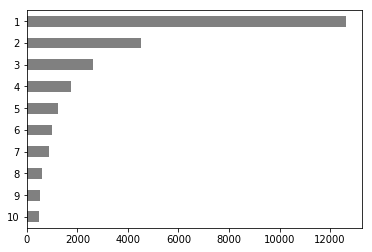

In [18]:
freq_spectrum.sort_values().plot.barh(color="grey")

#### Document-term matrix sorted in descending order

In [19]:
corpus.sort(dtm=corpus.dtm).iloc[:3,:10]

,the,and,to,of,in,he,was,that,his,it
af8b75fc-9c26-11e8-857e-002710199d64,6412,4226,5175,4004,2416,3667,2424,3373,2094,1854
af8b75fd-9c26-11e8-857e-002710199d64,4918,3706,2928,2642,1909,1387,1194,1389,1079,1464
af8b75fe-9c26-11e8-857e-002710199d64,4053,2979,2701,2216,1389,1135,1456,1139,1065,1129


#### Document-term matrix with z-scores

Used formula is: $z_x = \frac{x - \mu}{\sigma}$

In [20]:
corpus.zscores.iloc[:3,:10]

,a'mighty,a'most,a'n,a'ready,a-bakin,a-be,a-beatin,a-bed,a-begging,a-bleatin
af8b75fc-9c26-11e8-857e-002710199d64,-0.474342,-0.650791,-0.316228,-0.414039,-0.316228,-0.316228,-0.316228,-0.444478,-0.474342,-0.316228
af8b75fd-9c26-11e8-857e-002710199d64,-0.474342,0.162698,-0.316228,-0.414039,-0.316228,-0.316228,-0.316228,-0.444478,-0.474342,-0.316228
af8b75fe-9c26-11e8-857e-002710199d64,1.897367,0.162698,-0.316228,0.621059,-0.316228,-0.316228,2.846050,-0.444478,-0.474342,-0.316228


#### Document-term matrix with TF-IDF scores

Used formula is: $tf-idf_{t,d} \; = \; tf_{t,d} \times idf_t \; = \; tf_{t,d} \times log(\frac{N}{df_t})$

In [21]:
corpus.tfidf.iloc[:3,:10]

,a'mighty,a'most,a'n,a'ready,a-bakin,a-be,a-beatin,a-bed,a-begging,a-bleatin
af8b75fc-9c26-11e8-857e-002710199d64,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
af8b75fd-9c26-11e8-857e-002710199d64,0.000000,0.000009,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0
af8b75fe-9c26-11e8-857e-002710199d64,0.000017,0.000010,0.0,0.000035,0.0,0.0,0.000025,0.0,0.0,0.0


#### Sum tokens by document

In [22]:
corpus.sum_tokens

af8b75fc-9c26-11e8-857e-002710199d64    149926
af8b75fd-9c26-11e8-857e-002710199d64     99570
af8b75fe-9c26-11e8-857e-002710199d64     92012
af8b75ff-9c26-11e8-857e-002710199d64    127439
af8b7600-9c26-11e8-857e-002710199d64     87923
af8b7601-9c26-11e8-857e-002710199d64    158439
af8b7602-9c26-11e8-857e-002710199d64     97524
af8b7603-9c26-11e8-857e-002710199d64    147059
af8b7604-9c26-11e8-857e-002710199d64    146348
af8b7605-9c26-11e8-857e-002710199d64    203949
dtype: int64

#### Sum types by document

In [23]:
corpus.sum_types

KeyboardInterrupt: 

#### Get a document by its UUID

Show its bag-of-words representation:

In [ ]:
document = corpus.documents["041f98fb-9c25-11e8-857e-002710199d64"]
document.bow[:6]

Or its tokens (which is a generator):

In [ ]:
document.tokens

In [ ]:
tokens = list(document.tokens)[:6]
tokens

#### Get token lengths

In [ ]:
document.len

Or the mean token length:

In [ ]:
document.len.mean()

#### Sliding window

You can iterate with a sliding window over your document and count tokens in this window:

In [ ]:
for chunk in document.window(n=10):
    print(chunk)
    break

#### Get paragraphs or segments

In [ ]:
paragraphs = list(document.paragraphs(sep="\n"))
segments = list(document.segments(segment_size=1000))

print(f"There are {len(paragraphs)} paragraphs.")
print(f"And {len(segments)} segments, 1000 tokens each segment.")
print(f"First paragraph: {paragraphs[0]}\n")

#### Complexity metrics

There are a plenty of complexity metrics for measuring lexical richness (adapted from [here]()):

- Type-token ratio $TTR$ (including the possibility to standardize this)
- Brunet’s $W$
- Carroll’s $CTTR$
- Dugast’s $k$
- Guiraud’s $R$
- Tuldava’s $LN$
- Herdan’s $C$
- Summer’s $S$ 
- Maas’ $a^2$
- Simpson’s $S$
- Yule’s $K$
- Entropy

You can access them for the _whole corpus_ using the corresponding attributes:

In [24]:
corpus.ttr

39.64263237518911

Or by _document_ using the `complexity()` method. It is recommended to use a sliding window.

In [29]:
sttr = corpus.complexity(measure="ttr", window=2000)

Of course you can also map metadata here again:

In [30]:
sttr = corpus.map_metadata(sttr, metadata)
sttr

,sttr,ci
trollope_phineas,0.307230,0.004331
dickens_bleak,0.359245,0.007024
eliot_mill,0.365087,0.007684
eliot_adam,0.374310,0.006497
fielding_joseph,0.363512,0.004977
fielding_tom,0.359880,0.004151
thackeray_lyndon,0.378406,0.005436
dickens_david,0.346240,0.003996
trollope_prime,0.313212,0.004565
thackeray_vanity,0.388614,0.003362


And visualize the result e.g. as a barplot:

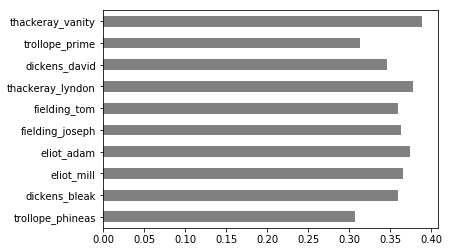

In [31]:
sttr["sttr"].plot.barh(color="grey")

## Low-level model classes

The `ct.pipe()` function wraps three classes:

1. `Textfile` models a document on the file level.
2. `Document` models a document on the text level.
3. `Corpus` models a collection of documents on the corpus level.

## Low-level helper functions

#### Tokenization

In [3]:
tokens = ct.find_tokens(document="Jemand mußte Josef K. verleumdet haben.",
                        pattern="\w+",
                        maximum=4)

print(f"The return value is a {type(tokens)}.")
print(f"Use it e.g. as a list: list(tokens) -> {list(tokens)}")

The return value is a <class 'generator'>.
Use it e.g. as a list: list(tokens) -> ['Jemand', 'mußte', 'Josef', 'K']


In [5]:
bigrams = ct.construct_ngrams(tokens=['Jemand', 'mußte', 'Josef', 'K'],
                              n=2,
                              sep=" ")
print(f"The return value is also a {type(bigrams)}.")
print(f"You can use it as a list, too: list(bigrams) -> {list(bigrams)}")

The return value is also a <class 'generator'>.
You can use it as a list, too: list(bigrams) -> ['Jemand mußte', 'mußte Josef', 'Josef K']


In [9]:
counts = ct.count_tokens(tokens=['Jemand mußte', 'mußte Josef', 'Josef K'])

print(f"The return value is a {type(counts)})")
print(f"But you can use it as a dictionary, if you want to: {counts.to_dict()}")

The return value is a <class 'pandas.core.series.Series'>)
But you can use it as a dictionary, if you want to: {'Jemand mußte': 1, 'mußte Josef': 1, 'Josef K': 1}


In [12]:
segments = ct.segment_fuzzy(paragraphs=[["Jemand", "mußte", "Josef", "K"],["verleumdet", "haben"]],
                            segment_size=2,
                            tolerance=0.05)

print(f"The return value is a {type(segments)})")
print(f"And you can use it e.g. as a list: {list(segments)}")

The return value is a <class 'generator'>)
And you can use it e.g. as a list: [[['Jemand', 'mußte']], [['Josef', 'K']], [['verleumdet', 'haben']]]


## 1. Text files

In [2]:
file = "/home/severin/kafka_derprozeß.xml"

In [3]:
f = ct.textfile(filepath=file,
                treat_as=".xml")

AttributeError: module 'cophi_toolbox' has no attribute 'textfile'

In [4]:
f.title

NameError: name 'f' is not defined

In [5]:
f.suffix

'.xml'

In [6]:
f.parent

'/home/severin'

In [7]:
f.content.strip()[:10]

'Der Prozeß'

### 1.1 Context manager

In [5]:
with ct.Textfile(file, treat_as=".xml") as document:
    print(f"First 10 characters of '{document.title + document.suffix}', treated as XML: \n{document.content.strip()[:10]}")

TypeError: 'Textfile' object is not an iterator

In [9]:
with ct.textfile(file, treat_as=".txt") as document:
    print(f"First 39 characters of '{document.title + document.suffix}', treated as plain text: \n{document.content.strip()[:39]}")

First 39 characters of 'kafka_derprozeß.xml', treated as plain text: 
<?xml version="1.0" encoding="UTF-8"?>



### 1.2 Processing XML

In [10]:
from lxml import etree

tree = f.parse_xml(parser=etree.XMLParser())
tree

In [11]:
tree.xpath("tei:text//text()", namespaces={"tei": "http://www.tei-c.org/ns/1.0"})[31]

'Jemand mußte Josef K. verleumdet haben, denn ohne daß er etwas Böses getan hätte, wurde er eines Morgens verhaftet. Die Köchin der Frau Grubach, seiner Zimmervermieterin, die ihm jeden Tag gegen acht Uhr früh das Frühstück brachte, kam diesmal nicht. Das war noch niemals geschehen. K. wartete noch ein Weilchen, sah von seinem Kopfkissen aus die alte Frau, die ihm gegenüber wohnte und die ihn mit einer an ihr ganz ungewöhnlichen Neugierde beobachtete, dann aber, gleichzeitig befremdet und hungrig, läutete er. Sofort klopfte es und ein Mann, den er in dieser Wohnung noch niemals gesehen hatte, trat ein. Er war schlank und doch fest gebaut, er trug ein anliegendes schwarzes Kleid, das, ähnlich den Reiseanzügen, mit verschiedenen Falten, Taschen, Schnallen, Knöpfen und einem Gürtel versehen war und infolgedessen, ohne daß man sich darüber klar wurde, wozu es dienen sollte, besonders praktisch erschien. »Wer sind Sie?« fragte K. und saß gleich halb aufrecht im Bett. Der Mann aber ging über

## Use case: Segmenting and tokenizing a textfile

In [18]:
segments = list(d.get_segments(segment_size=1000))
print(f"{len(segments)} segments in '{f.title}'.")

71 segments in 'kafka_derprozeß'.


In [19]:
labels = [f"{f.title}_{n}" for n in range(len(segments))]

In [20]:
import pandas as pd

# performance: pandas und z. b. listen statt irgendwelchen anderen standarddatentypen
pd.Series(segments, index=labels).head(10)

kafka_derprozeß_0    [der, prozeß, hdl, de, textgrid:qmx, der, anno...
kafka_derprozeß_1    [vielleicht, noch, besaß, schätzte, er, nicht,...
kafka_derprozeß_2    [worte, die, ich, mit, einem, mir, ebenbürtige...
kafka_derprozeß_3    [gehen, pflegte, spät, nach, hause, kam, und, ...
kafka_derprozeß_4    [er, dann, hinüber, die, drei, wichen, auch, s...
kafka_derprozeß_5    [mann, aufmerksam, machte, den, er, selbst, sc...
kafka_derprozeß_6    [ja, bloß, die, vermieterin, nun, ich, habe, a...
kafka_derprozeß_7    [fenster, lag, und, die, müden, augen, drückte...
kafka_derprozeß_8    [den, leib, schickt, da, sie, aber, doch, frei...
kafka_derprozeß_9    [hat, eine, größere, summe, von, mir, geliehen...
dtype: object

## 3. Corpus

In [21]:
import pathlib
import pandas as pd

directory = "british-fiction-corpus"

In [22]:
glob = pathlib.Path(directory).glob("**/*.txt")

def lazy_reading(glob):
    for filepath in glob:
        yield ct.textfile(filepath)

documents = pd.Series()
for document in lazy_reading(glob):
    t = ct.document(document.content)
    tokens = pd.Series(t.tokens)
    tokens.name = document.title
    documents[document.title] = tokens

In [23]:
documents[0][:10]

0     phineas
1        finn
2          by
3     anthony
4    trollope
5      volume
6     chapter
7          dr
8        finn
9          of
Name: trollope_phineas, dtype: object

In [24]:
c = ct.corpus(documents=documents)

### 3.1 Corpus size

In [25]:
c.size

documents       10
types        33050
dtype: int64

### 3.2 Most frequent words

In [26]:
c.get_mfw(n=10)

['the', 'and', 'to', 'of', 'in', 'he', 'was', 'that', 'his', 'it']

### 3.3 Hapax legomena

In [27]:
c.get_hl()[:10]

["a'mighty",
 "a'n",
 'a-bakin',
 'a-beatin',
 'a-begging',
 'a-bleatin',
 'a-bringin',
 'a-carrying',
 'a-collectin',
 'a-comin']

### 3.4 Document-term matrix

In [28]:
c.dtm

,a'mighty,a'most,a'n,a'ready,a-bakin,a-be,a-beatin,a-bed,a-begging,a-bleatin,...,zitwitz,zoggy,zone,zoo,zoodle,zooks,zoological,zounds,zu,zuch
trollope_phineas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0
dickens_bleak,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
eliot_mill,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
eliot_adam,1.0,3.0,0.0,6.0,1.0,4.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fielding_joseph,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fielding_tom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
thackeray_lyndon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dickens_david,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
trollope_prime,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
thackeray_vanity,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 3.5 Sorted document-term matrix

In [29]:
c.sorted_dtm

,the,and,to,of,in,he,was,that,his,it,...,jail-delivery,janeiro,jamais,jamaica,jam-tarts,jam-puffs,jam-pots,jaisey,jammed,zuch
trollope_phineas,6412.0,4226.0,5175.0,4004.0,2416.0,3667.0,2424.0,3373.0,2094.0,1854.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dickens_bleak,4918.0,3706.0,2928.0,2642.0,1909.0,1387.0,1194.0,1389.0,1079.0,1464.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eliot_mill,4053.0,2979.0,2701.0,2216.0,1389.0,1135.0,1456.0,1139.0,1065.0,1129.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
eliot_adam,6304.0,4220.0,3875.0,2909.0,1983.0,1649.0,1795.0,1542.0,1252.0,1404.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fielding_joseph,4758.0,2474.0,2885.0,2555.0,1512.0,1694.0,1125.0,1022.0,1309.0,770.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fielding_tom,8171.0,4295.0,5381.0,5195.0,2800.0,2547.0,2040.0,1934.0,2081.0,1598.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
thackeray_lyndon,5987.0,3963.0,2881.0,3432.0,1956.0,877.0,1724.0,1121.0,1025.0,746.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dickens_david,6115.0,5613.0,4309.0,3701.0,2700.0,1648.0,2566.0,2279.0,1243.0,2162.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
trollope_prime,6645.0,3756.0,5501.0,3707.0,2130.0,3412.0,2309.0,3232.0,2153.0,2195.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
thackeray_vanity,11918.0,8784.0,5581.0,5873.0,3719.0,2565.0,2976.0,2264.0,2706.0,1505.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


### 3.6 Relative word frequencies

In [30]:
c.rel_freqs

,a'mighty,a'most,a'n,a'ready,a-bakin,a-be,a-beatin,a-bed,a-begging,a-bleatin,...,zitwitz,zoggy,zone,zoo,zoodle,zooks,zoological,zounds,zu,zuch
trollope_phineas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000013,0.00000,0.000000,0.000007,0.000000,0.000000,0.000000
dickens_bleak,0.000000,0.000010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00001,0.000000,0.00001,0.000000,0.000000,0.000000,0.000000,0.000000
eliot_mill,0.000011,0.000011,0.000000,0.000022,0.000000,0.000000,0.000011,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000011,0.000000,0.000000,0.000000
eliot_adam,0.000008,0.000024,0.000000,0.000047,0.000008,0.000031,0.000000,0.000008,0.000000,0.000008,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
fielding_joseph,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
fielding_tom,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000013,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.000006,0.000000,0.000013,0.000006,0.000006
thackeray_lyndon,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00001,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
dickens_david,0.000000,0.000020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
trollope_prime,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000007,0.000000,...,0.00000,0.000000,0.00000,0.000007,0.00000,0.000000,0.000007,0.000000,0.000000,0.000000
thackeray_vanity,0.000000,0.000000,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000005,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


### 3.7 z-scores

In [31]:
c.zscores

,a'mighty,a'most,a'n,a'ready,a-bakin,a-be,a-beatin,a-bed,a-begging,a-bleatin,...,zitwitz,zoggy,zone,zoo,zoodle,zooks,zoological,zounds,zu,zuch
trollope_phineas,-0.474342,-0.650791,-0.316228,-0.414039,-0.316228,-0.316228,-0.316228,-0.444478,-0.474342,-0.316228,...,-0.316228,-0.316228,-0.316228,2.518710,-0.316228,-0.316228,1.449138,-0.316228,-0.316228,-0.316228
dickens_bleak,-0.474342,0.162698,-0.316228,-0.414039,-0.316228,-0.316228,-0.316228,-0.444478,-0.474342,-0.316228,...,-0.316228,-0.316228,2.846050,-0.444478,2.846050,-0.316228,-0.621059,-0.316228,-0.316228,-0.316228
eliot_mill,1.897367,0.162698,-0.316228,0.621059,-0.316228,-0.316228,2.846050,-0.444478,-0.474342,-0.316228,...,-0.316228,-0.316228,-0.316228,-0.444478,-0.316228,-0.316228,1.449138,-0.316228,-0.316228,-0.316228
eliot_adam,1.897367,1.789676,-0.316228,2.691256,2.846050,2.846050,-0.316228,1.037116,-0.474342,2.846050,...,-0.316228,-0.316228,-0.316228,-0.444478,-0.316228,-0.316228,-0.621059,-0.316228,-0.316228,-0.316228
fielding_joseph,-0.474342,-0.650791,-0.316228,-0.414039,-0.316228,-0.316228,-0.316228,-0.444478,-0.474342,-0.316228,...,-0.316228,-0.316228,-0.316228,-0.444478,-0.316228,-0.316228,-0.621059,-0.316228,-0.316228,-0.316228
fielding_tom,-0.474342,-0.650791,-0.316228,-0.414039,-0.316228,-0.316228,-0.316228,2.518710,-0.474342,-0.316228,...,-0.316228,-0.316228,-0.316228,-0.444478,-0.316228,2.846050,-0.621059,2.846050,2.846050,2.846050
thackeray_lyndon,-0.474342,-0.650791,-0.316228,-0.414039,-0.316228,-0.316228,-0.316228,-0.444478,-0.474342,-0.316228,...,2.846050,-0.316228,-0.316228,-0.444478,-0.316228,-0.316228,-0.621059,-0.316228,-0.316228,-0.316228
dickens_david,-0.474342,1.789676,-0.316228,-0.414039,-0.316228,-0.316228,-0.316228,-0.444478,1.897367,-0.316228,...,-0.316228,-0.316228,-0.316228,-0.444478,-0.316228,-0.316228,-0.621059,-0.316228,-0.316228,-0.316228
trollope_prime,-0.474342,-0.650791,-0.316228,-0.414039,-0.316228,-0.316228,-0.316228,-0.444478,1.897367,-0.316228,...,-0.316228,-0.316228,-0.316228,1.037116,-0.316228,-0.316228,1.449138,-0.316228,-0.316228,-0.316228
thackeray_vanity,-0.474342,-0.650791,2.846050,-0.414039,-0.316228,-0.316228,-0.316228,-0.444478,-0.474342,-0.316228,...,-0.316228,2.846050,-0.316228,-0.444478,-0.316228,-0.316228,-0.621059,-0.316228,-0.316228,-0.316228


### 3.8 TF-IDF

In [32]:
#c.tfidf

### 3.9 Dropping types

In [33]:
print(f"Before: {c.dtm.shape[1]} types.")

clean = c.drop(c.dtm, c.hapax() + c.get_mfw())

print(f"After: {clean.shape[1]} types.")

Before: 33050 types.
After: 16455 types.


### 3.10 Vocabulary

In [34]:
c.vocabulary[:10]

["a'mighty",
 "a'most",
 "a'n",
 "a'ready",
 'a-bakin',
 'a-be',
 'a-beatin',
 'a-bed',
 'a-begging',
 'a-bleatin']

### 3.11 Complexity measures

#### 3.11.1 Frequency spectrum

In [35]:
c.freq_spectrum[:10]

1.0     12616
2.0      4508
3.0      2627
4.0      1760
5.0      1253
6.0      1012
7.0       863
8.0       586
9.0       519
10.0      467
dtype: int64

#### 3.11.2 Summed tokens

In [36]:
c.sum_tokens

1310189.0

#### 3.11.3 Summed types

In [37]:
c.sum_types

95205

#### 3.11.4 Corpus type-token ratio

In [38]:
c.ttr

0.07266508877726802

In [ ]:
namenskonvention für bestimmte gruppen von maßen

In [51]:
c.yule_k

78.56773990445538

#### 3.11.5 Document type-token ratio

In [39]:
# kein direkt abrufbares maß, aber trotzdem zur verfügung stellen

c.get_ttr()

trollope_phineas    0.052326
dickens_bleak       0.092136
eliot_mill          0.095944
eliot_adam          0.081270
fielding_joseph     0.086144
fielding_tom        0.063261
thackeray_lyndon    0.095341
dickens_david       0.068041
trollope_prime      0.053810
thackeray_vanity    0.069748
dtype: float64

#### 3.11.6 A lot more

Example: Summer's index of lexical richness

$S = \frac{\log{\log{V}}}{\log{\log{N}}}$

In [40]:
print(f"For whole corpus: {c.summer_s}")

For whole corpus: 0.9221348672207048


### 4. Pipeline

In [42]:
c = ct.pipe(directory="british-fiction-corpus",
            suffix=".txt",
            treat_as=".txt")

- treat_as=None, schau aufs suffix, sonst treat_as.

- parameterobjekte

dokument klasse: id_menschenlesbar
    
metadatendataframe: methode, der man dtm übergibt und sich das anzeigen lassen kann

In [53]:
metadata.show_df(c.dtm)

AttributeError: 'DataFrame' object has no attribute '_repr_html'